In [1]:
import numpy as np
import matplotlib.pyplot as plt
import function as func
import csv
import matplotlib.patches as patches

In [2]:
import matplotlib.ticker
class OOMFormatter(matplotlib.ticker.ScalarFormatter):
    def __init__(self, order=0, fformat="%1.1f", offset=True, mathText=False):
        self.oom= order
        self.fformat= fformat
        matplotlib.ticker.ScalarFormatter.__init__(self,useOffset=offset,useMathText=mathText)
    def _set_order_of_magnitude(self):
        self.orderOfMagnitude= self.oom
    def _set_format(self, vmin=None, vmax=None):
        self.format= self.fformat
        if self._useMathText:
            self.format= r'$\mathdefault{%s}$' % self.format

In [3]:
check_freq = np.array([18190, 18336, 19120, 19186, 19440, 19478, 19766, 19794, 19818, 20006, 20296, 20302, 20490, 20540, 20892, 21442, 21808, 22522, 22672, 23306, 23808, 23934, 25328, 25352, 25860, 26274, 26346])
check_freq = check_freq*1000 - 250

A_geom = np.pi * (59.3/2*1e-3)**2
eta = 0.63
c = 299792458. # [m/sec] speed of light from wikipedia
v_c = 220.e+3 # [m/sec] speed of solar system
h_plunk = 6.62607004e-34
ev = 1.602176634e-19
const = ev/h_plunk/1e9 # 2.4e5
const_zoom = ev/h_plunk/1e9/1e6 # 2.4e5

def eta_win(freq):
    return 0.23 + 0.017 * (freq - 22)

In [70]:
def plot_zoom(axes):
    path = ["HPDM_by_shugo"]
    color = ["blue"]
    legend = ["CMB"]
    hatch = ["\\"]
    for i in range(len(path)):
        data = np.loadtxt("plot/constraints_copy/{}.txt".format(path[i]), delimiter = ",", unpack = True)
        mass = 10 ** data[0]
        chi = 10 ** data[1]
        upper = [10**-4*1e10] * len(mass)
        # color
        # axes.fill_between(mass*1e6, chi*1e10, upper, label=legend[i], color=color[i], alpha=0.2)
        # gray
        axes.fill_between(mass*1e6, chi*1e10, upper, label=legend[i], fc="w", hatch=hatch[i])
        axes.plot(mass*1e6, chi*1e10, color="black")
    
    """
    data = np.loadtxt("plot/constraints_copy/result_raw.txt", unpack = True)
    mass = data[0] * 1e-6
    chi = data[1]
    upper = [10**-4] * len(mass)
    axes.fill_between(mass*1e6, chi, upper, label="Pilot Experiment", color="black")
    print(mass[0]*const_zoom)
    print(mass[-1]*const_zoom)
    """
    
    data = func.csv_to_array("/data/ms2840a/result_data/chi_limit_final.csv")
    """
    # color
    axes.fill_between(data["freq"]/const_zoom, data["chi"]*1e10, np.ones(len(data["chi"]))*1e10, color="red", label="This Result", alpha=0.3)
    axes.plot(data["freq"]/const_zoom, data["chi"]*1e10, color="red")
    axes.axvline(x=data["freq"][0]/const_zoom, ymin=data["chi"][0]/1e-9*1e10, ymax=1, color="red")
    axes.axvline(x=data["freq"][-1]/const_zoom, ymin=data["chi"][-1]/1e-9*1e10, ymax=1, color="red")
    """
    # gray 
    axes.fill_between(data["freq"]/const_zoom, data["chi"]*1e10, np.ones(len(data["chi"]))*1e10, fc="w", hatch="///", label="This Result")
    axes.plot(data["freq"]/const_zoom, data["chi"]*1e10, color="black")
    axes.axvline(x=data["freq"][0]/const_zoom, ymin=(data["chi"][0]*1e10)/10, ymax=1, color="black")
    axes.axvline(x=data["freq"][-1]/const_zoom, ymin=(data["chi"][-1]*1e10)/10, ymax=1, color="black")
    
    axes.set_xlabel(r"Dark Photon Mass $m_{\rm DP} ~\rm [\mu eV/c^2]$")
    axes.set_ylabel(r"Coupling Constant $\chi ~[\times 10^{-10}]$")
    axes.set_xlim(70, 115)
    axes.set_ylim(0, 10)
    #axes.yaxis.set_major_formatter(OOMFormatter(-10, "%1.1f"))
    axes.tick_params(axis='x')
    axes.tick_params(axis='y')
    axes.grid()

    x1, x2 = axes.get_xlim() 
    twin_axes=axes.twiny() 
    twin_axes.set_xlim(const_zoom*x1,const_zoom*x2)
    twin_axes.set_xlabel("Frequency [GHz]")
    twin_axes.tick_params(axis='x')

In [77]:
def plot_this(axes):
    path = ["HPDM_by_shugo", "Redo_rev", "Haloscope_blue_0", "Haloscope_blue_1", "Haloscope_blue_2"]
    color = ["blue", "magenta", "green", "green", "green"]
    legend = ["CMB", "Solar Lifetime", "Haloscope", "", ""]
    hatch = ["\\", "..", "--", "--", "--"]
    for i in range(len(path)):
        data = np.loadtxt("plot/constraints_copy/{}.txt".format(path[i]), delimiter = ",", unpack = True)
        mass = 10 ** data[0]
        chi = 10 ** data[1]
        upper = [10**-4] * len(mass)
        # color
        # axes.fill_between(mass, chi, upper, label=legend[i], color=color[i], alpha=0.2)
        # gray
        axes.fill_between(mass, chi, upper, label=legend[i], fc="w", hatch=hatch[i])
        axes.plot(mass, chi, color="black")
        axes.plot([mass[0], mass[0]], [chi[0], upper[0]], color="black")
        axes.plot([mass[-1], mass[-1]], [chi[-1], upper[-1]], color="black")

    data = np.loadtxt("plot/constraints_copy/result_raw.txt", unpack = True)
    mass = data[0] * 1e-6
    chi = data[1]
    upper = [10**-4] * len(mass)
    axes.fill_between(mass, chi, upper, label="Tomita et al.", color="black")
    
    data = func.csv_to_array("/data/ms2840a/result_data/chi_limit_final.csv")
    """
    # color
    axes.fill_between(data["freq"]/const, data["chi"], np.ones(len(data["chi"])), color="red", label="This Result", alpha=0.3)
    axes.plot(data["freq"]/const, data["chi"], color="red")
    axes.axvline(x=data["freq"][0]/const, ymin=(11+np.log10(data["chi"][0]))/3, ymax=1, color="red")
    axes.axvline(x=data["freq"][-1]/const, ymin=(11+np.log10(data["chi"][-1]))/3, ymax=1, color="red")
    """
    # gray
    axes.fill_between(data["freq"]/const, data["chi"], np.ones(len(data["chi"])), fc="w", hatch="///", label="This Result")
    axes.plot(data["freq"]/const, data["chi"], color="black")
    axes.axvline(x=data["freq"][0]/const, ymin=(11+np.log10(data["chi"][0]))/3, ymax=1, color="black")
    axes.axvline(x=data["freq"][-1]/const, ymin=(11+np.log10(data["chi"][-1]))/3, ymax=1, color="black")
    
    axes.set_xlabel(r"Dark Photon Mass $m_{\rm DP} ~\rm [eV/c^2]$")
    axes.set_ylabel(r"Coupling Constant $\chi$")
    axes.set_xlim(1e-6, 1e-2)
    axes.set_ylim([1e-11, 1e-8])
    axes.set_xscale('log')
    axes.set_yscale('log')
    axes.tick_params(axis='x')
    axes.tick_params(axis='y')
    axes.legend(loc="upper left", fontsize=18).get_frame().set_alpha(1)
    axes.grid()
    
    x1, x2 = axes.get_xlim() 
    twin_axes=axes.twiny() 
    twin_axes.set_xscale("log")
    twin_axes.set_xlim(const*x1,const*x2)
    twin_axes.set_xlabel("Frequency [GHz]")
    twin_axes.tick_params(axis='x')

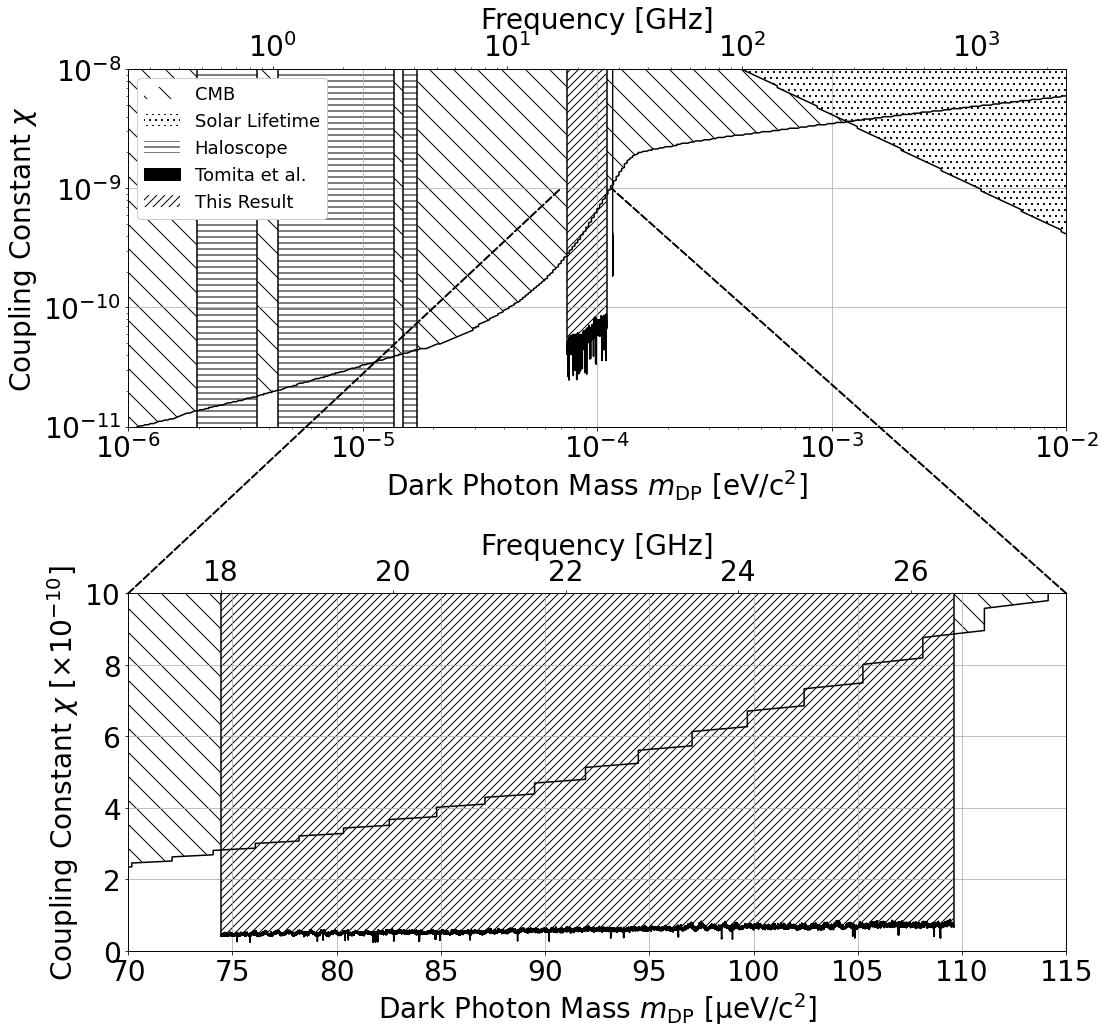

In [78]:
fig = plt.figure(figsize=(16, 15))
plt.rcParams["font.size"] = 28
#plt.suptitle("Constraints for Dark Photon Search")
plt.subplots_adjust()


# Create first axes, the top-left plot with green plot
sub1 = fig.add_subplot(2,1,1) # two rows, two columns, fist cell
plot_this(sub1)


# Create second axes, the top-left plot with orange plot
sub2 = fig.add_subplot(2,1,2) # two rows, two columns, second cell
plot_zoom(sub2)

#sub1.fill_between((70e-6,115e-6), 1e-9, 1, facecolor='orange', alpha=0.2)
con1 = patches.ConnectionPatch(xyA=(70, 1e-9*1e10), coordsA=sub2.transData, 
                       xyB=(70e-6, 1e-9), coordsB=sub1.transData, color='black', linestyle = "--", linewidth=2)
fig.add_artist(con1)
con2 = patches.ConnectionPatch(xyA=(115, 1e-9*1e10), coordsA=sub2.transData, 
                       xyB=(115e-6, 1e-9), coordsB=sub1.transData, color='black', linestyle = "--", linewidth=2)
fig.add_artist(con2)

fig.tight_layout()

plt.savefig("../result_figure/limit_zoom_gray.png")

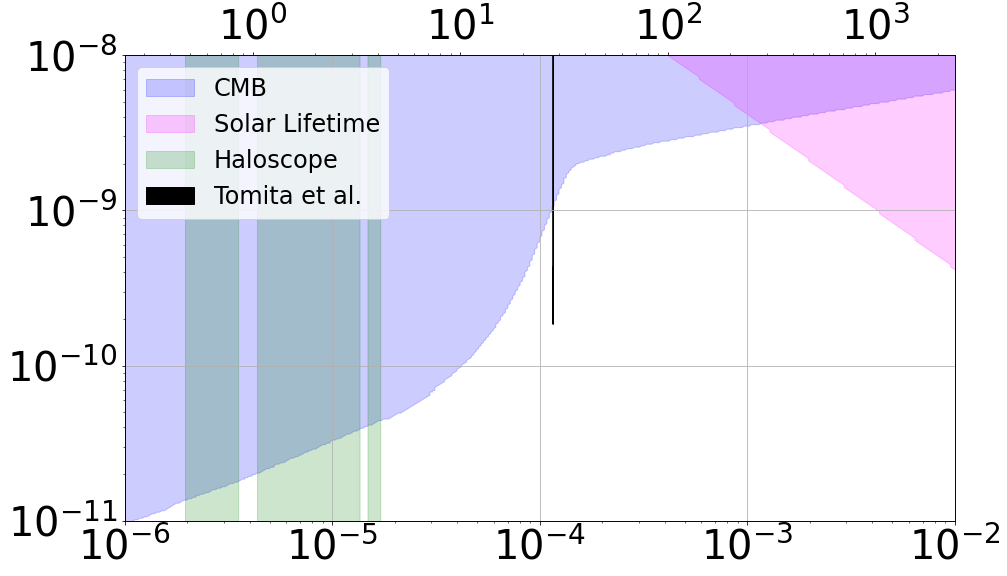

In [9]:
fig, axes = plt.subplots(figsize=(15, 9))
plt.rcParams["font.size"] = 40
#plt.suptitle("Constraints for Dark Photon Search")
plt.subplots_adjust()

path = ["HPDM_by_shugo", "Redo_rev", "Haloscope_blue_0", "Haloscope_blue_1", "Haloscope_blue_2"]
#path = ["HPDM_by_shugo"]
color = ["blue", "magenta", "green", "green", "green"]
#color = ["blue"]
legend = ["CMB", "Solar Lifetime", "Haloscope", "", ""]
#legend = ["CMB"]
for i in range(len(path)):
    data = np.loadtxt("plot/constraints_copy/{}.txt".format(path[i]), delimiter = ",", unpack = True)
    mass = 10 ** data[0]
    chi = 10 ** data[1]
    upper = [10**-4] * len(mass)
    axes.fill_between(mass, chi, upper, label=legend[i], color=color[i], alpha=0.2)


data = np.loadtxt("plot/constraints_copy/result_raw.txt", unpack = True)
mass = data[0] * 1e-6
chi = data[1]
upper = [10**-4] * len(mass)
axes.fill_between(mass, chi, upper, label="Tomita et al.", color="black")


data = func.csv_to_array("/data/ms2840a/result_data/chi_limit_final.csv")
#axes.fill_between(data["freq"]/const, data["chi"], np.ones(len(data["chi"])), color="red", label="This Result", alpha=0.3)
    

#axes.set_xlabel(r"Dark Photon Mass $m_{\rm DP} ~\rm [eV/c^2]$")
#axes.set_ylabel(r"Coupling Constant $\chi$")
axes.set_xlim(1e-6, 1e-2)
#axes.set_xlim(70, 115)
axes.set_ylim([1e-11, 1e-8])
#axes.set_ylim([0, 1e-9])
axes.set_xscale('log')
axes.set_yscale('log')
axes.tick_params(axis='x')
axes.tick_params(axis='y')
axes.legend(loc="upper left", fontsize=24)
axes.grid()

x1, x2 = axes.get_xlim() 
twin_axes=axes.twiny() 
twin_axes.set_xscale("log")
twin_axes.set_xlim(const*x1,const*x2)
#twin_axes.set_xlabel("Frequency [GHz]")
twin_axes.tick_params(axis='x')

fig.tight_layout()
plt.savefig("../result_figure/slide_figure/my_limit.png")